In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [2]:
# Load the file to inspect its contents
filename = r"/global/cfs/projectdirs/m4895/RAE2Data/interpolatedRAE2MasterFile.csv"

rawData = pd.read_csv(filename)
data = rawData
data['time'] = pd.to_datetime(data['time'])
data.drop('Unnamed: 0',axis=1,inplace=True)
data.set_index('time',inplace=True)

In [3]:
start_date = pd.to_datetime("1974-01-01 14:00")
end_date = pd.to_datetime("1975-12-31 16:00")

# Selecting rows within the date range
df = data[(data.index >= start_date) & (data.index <= end_date)].copy()

In [4]:
diffrv2 = np.diff(df['rv2_coarse'])
diffrv1 = np.diff(df['rv1_coarse'])

In [5]:
cnt1 = pd.Series(diffrv1).value_counts().sort_index()
cnt2 = pd.Series(diffrv2).value_counts().sort_index()


In [6]:
mode1 = cnt1[cnt1 == cnt1.max()]
mode2 = cnt2[cnt2 == cnt2.max()]


In [7]:

print("rv1 mode(s):")
print(mode1)
print("\nrv2 mode(s):")
print(mode2)

rv1 mode(s):
0.0    1554956
Name: count, dtype: int64

rv2 mode(s):
0.0    1428665
Name: count, dtype: int64


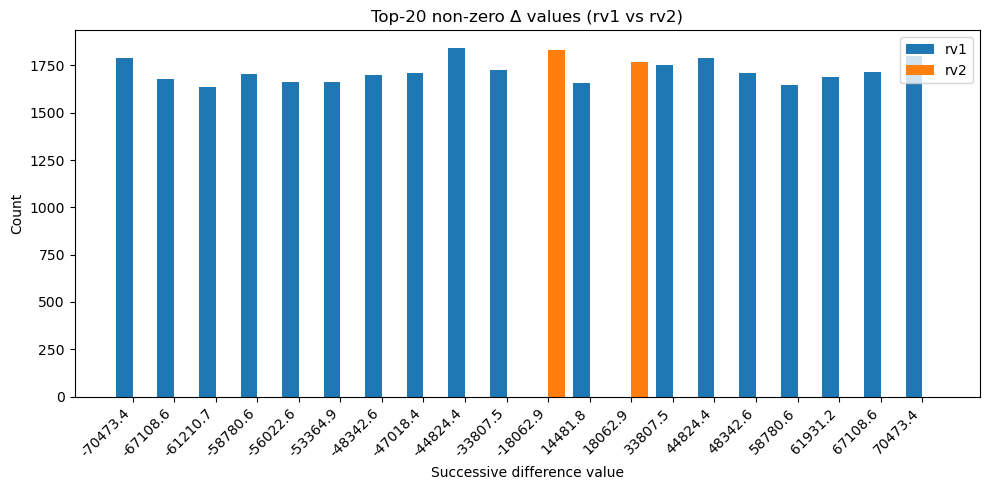

In [9]:
cnt1 = pd.Series(diffrv1).value_counts().drop(0, errors="ignore")
cnt2 = pd.Series(diffrv2).value_counts().drop(0, errors="ignore")

# --- 3. top‑20 values across both channels ---
top_vals = (cnt1.add(cnt2, fill_value=0)        # combined counts
                  .nlargest(20)                 # biggest 20 (now excluding 0)
                  .index.sort_values())         # sorted for cleaner axis

cnt1_top = cnt1.reindex(top_vals, fill_value=0)
cnt2_top = cnt2.reindex(top_vals, fill_value=0)

# --- 4. bar chart ---
x     = np.arange(len(top_vals))
width = 0.40

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, cnt1_top.values, width, label="rv1")
ax.bar(x + width/2, cnt2_top.values, width, label="rv2")

ax.set_xticks(x)
ax.set_xticklabels([f"{v:g}" for v in top_vals], rotation=45, ha="right")
ax.set_xlabel("Successive difference value")
ax.set_ylabel("Count")
ax.set_title("Top‑20 non‑zero Δ values (rv1 vs rv2)")
ax.legend()
plt.tight_layout()
plt.show()